<a href="https://colab.research.google.com/github/8manrocks/college_predictions_regression_model/blob/main/college_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Admission_Predict.csv')
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


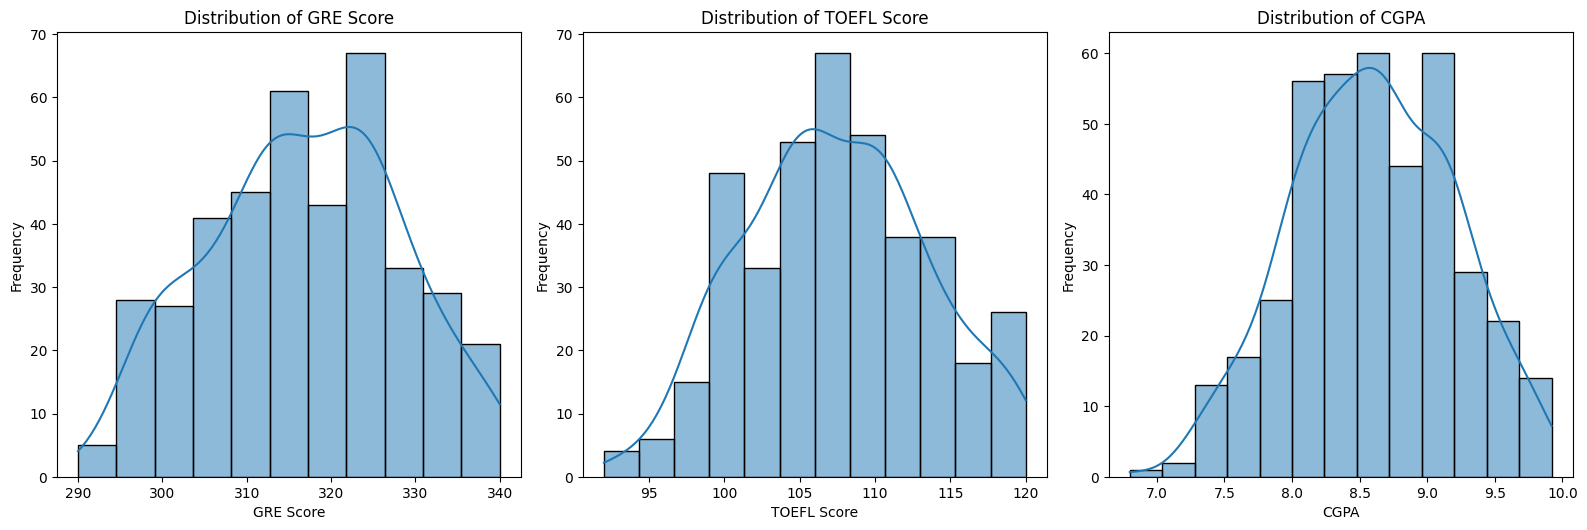

In [ ]:

# Visualizations
plt.figure(figsize=(16, 10))

# Histograms for GRE Score, TOEFL Score, and CGPA
for i, col in enumerate(['GRE Score', 'TOEFL Score', 'CGPA']):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


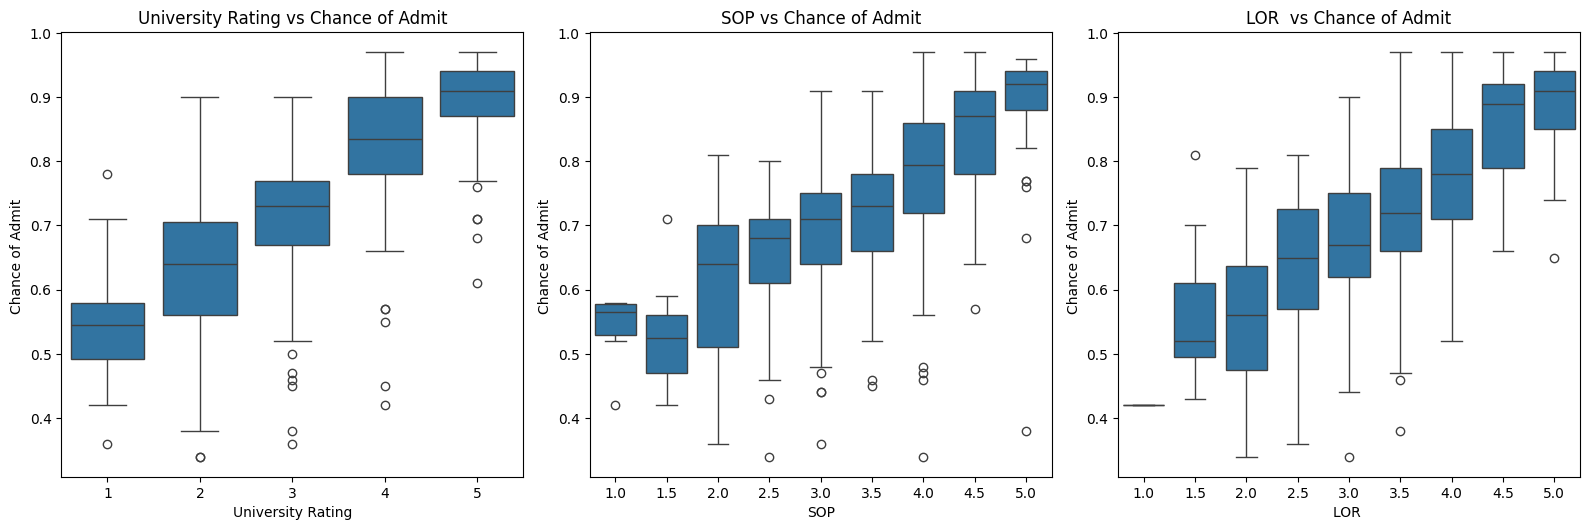

In [ ]:
# Visualizations
plt.figure(figsize=(16, 10))

# Boxplots for University Rating, SOP, LOR with respect to Chance of Admit
for i, col in enumerate(['University Rating', 'SOP', 'LOR ']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=col, y='Chance of Admit ', data=df)
    plt.title(f'{col} vs Chance of Admit')

plt.tight_layout()
plt.show()

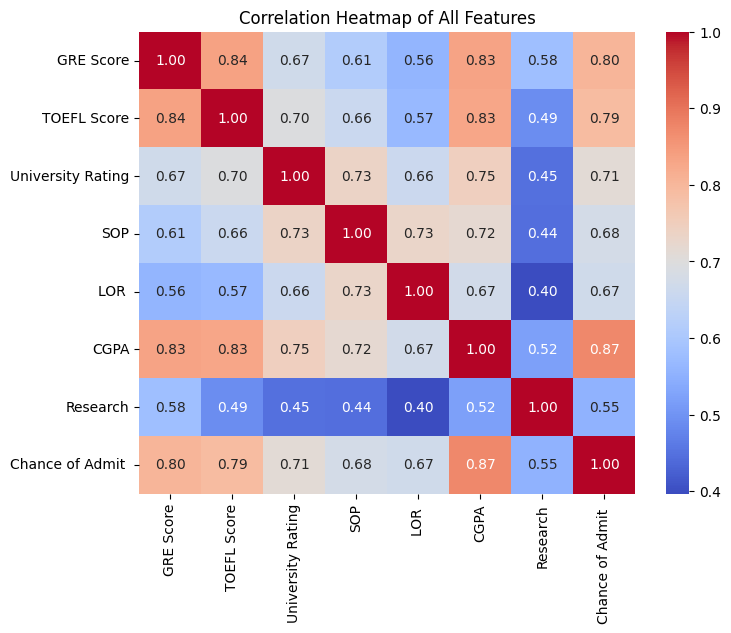

In [ ]:
# Now, we'll plot the correlation heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap of All Features')
plt.show()

Text(0, 0.5, 'Count')

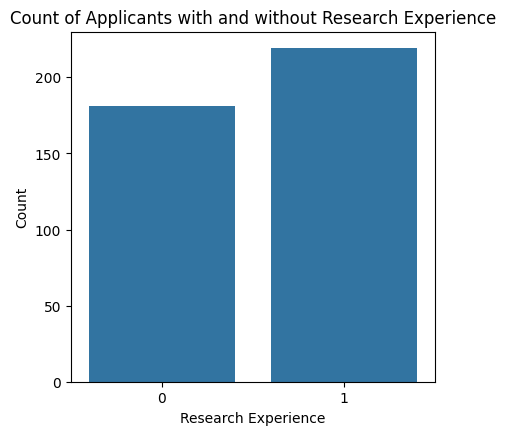

In [ ]:
# Visualizations
plt.figure(figsize=(16, 10))

# Bar chart for Research
plt.subplot(2, 3, 4)
sns.countplot(x='Research', data=df)
plt.title('Count of Applicants with and without Research Experience')
plt.xlabel('Research Experience')
plt.ylabel('Count')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming 'df' is your DataFrame and 'Chance of Admit' is the target variable

# Separate the features and the target variable
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

# Identifying categorical and numerical columns
# Assuming 'University Rating' and 'Research' are the only categorical columns
def transform_data(X):
  categorical_cols = ['University Rating', 'Research']
  numerical_cols = [col for col in X.columns if col not in categorical_cols]

  # Creating a column transformer for preprocessing
  preprocessor = ColumnTransformer(
      transformers=[
          ('num', StandardScaler(), numerical_cols),
          ('cat', OneHotEncoder(), categorical_cols)
      ])

  # Creating a preprocessing and training pipeline
  pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

  # Applying the transformations to the features
  X_transformed = pipeline.fit_transform(X)
  return X_transformed;

X_transformed = transform_data(X);
# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# The data is now preprocessed, scaled, encoded, and split into training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((320, 12), (80, 12), (320,), (80,))

In [ ]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 0.004577038990636137
Mean Absolute Error: 0.047713278798518166
Root Mean Squared Error: 0.06765381726581389


In [ ]:
df_test = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')
df_test.drop('Serial No.', axis=1, inplace=True)
a = df_test.drop('Chance of Admit ', axis=1)
b = df_test['Chance of Admit ']
a_transformed = transform_data(a);
predictions = model.predict(a_transformed);
se = mean_squared_error(b, predictions)
ae = mean_absolute_error(b, predictions)
rse = mean_squared_error(b, predictions, squared=False)
print(f"Mean Squared Error: {se}")
print(f"Mean Absolute Error: {ae}")
print(f"Root Mean Squared Error: {rse}")
print(predictions);

Mean Squared Error: 0.003567478910825924
Mean Absolute Error: 0.04184719795852121
Root Mean Squared Error: 0.05972837609399676
[0.94199007 0.79825638 0.66152768 0.74969872 0.6409229  0.88435181
 0.71553661 0.60496001 0.56952384 0.72330206 0.73731511 0.82990701
 0.84588115 0.65092698 0.65106208 0.65607128 0.72039432 0.66537127
 0.74202477 0.65688328 0.62760198 0.70500904 0.93286045 0.9674358
 0.96650542 0.97034354 0.77664029 0.53107702 0.44865732 0.50388903
 0.60777445 0.72156639 0.91536405 0.94538106 0.96068669 0.86689993
 0.65837956 0.55926126 0.52595259 0.59283096 0.65551632 0.66421308
 0.68999895 0.83733999 0.89348173 0.84379814 0.90634528 0.94636551
 0.80723144 0.75435242 0.68807077 0.62411255 0.72153839 0.69450972
 0.6673306  0.6021623  0.55768639 0.51541374 0.45316838 0.63244259
 0.61082509 0.62814184 0.64927787 0.70995704 0.7545377  0.78145757
 0.79495243 0.73529158 0.82455352 0.85341231 0.96188903 0.96604532
 0.89972694 0.7933827  0.76538139 0.77833533 0.77822076 0.5905054
 0.5